<a href="https://colab.research.google.com/github/laxmispandana/Explainable-AI_lab/blob/main/explainable_ai_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Data Loaded Successfully!
Shape: (541, 43)
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1             10001           0          28         44.6        152.0   
1       2             10002           0          36         65.0        161.5   
2       3             10003           1          33         68.8        165.0   
3       4             10004           0          37         65.0        148.0   
4       5             10005           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Syst

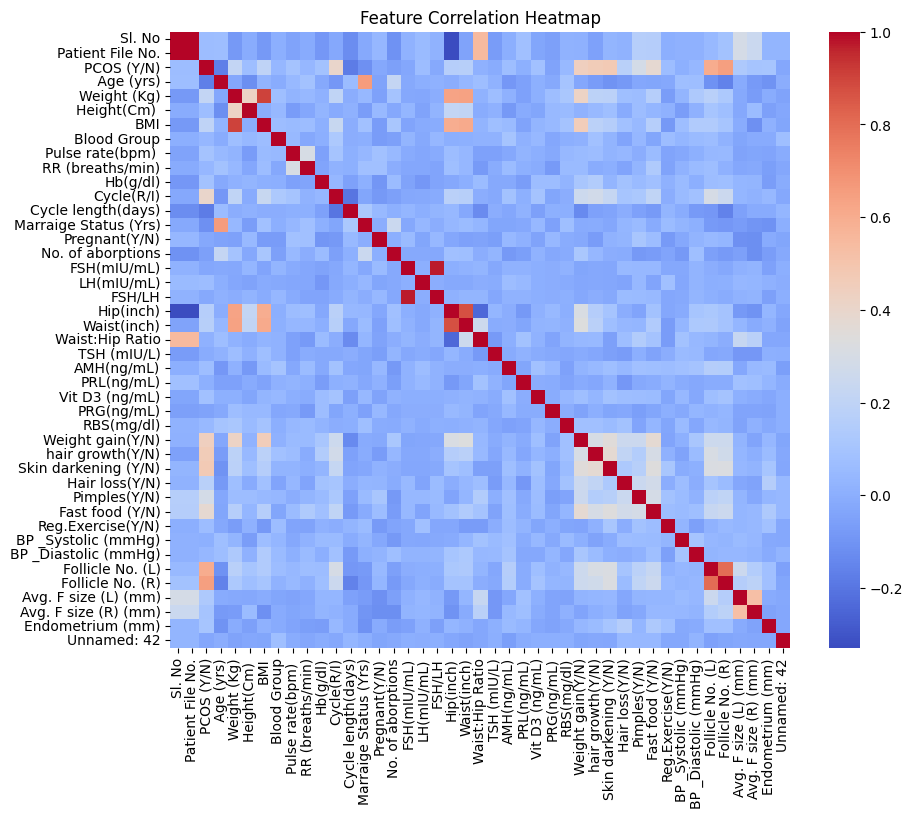


✅ Removed Highly Correlated Columns: ['Sl. No', 'Patient File No.', 'Weight (Kg)', 'FSH/LH', 'FSH(mIU/mL)', 'Waist(inch)', 'Hip(inch)', 'BMI']

Class distribution before SMOTE: Counter({0.0: 364, 1.0: 177})
⚙️ Using k_neighbors=5 for SMOTE
✅ SMOTE Balancing Done!
Class distribution after SMOTE: Counter({0.0: 364, 1.0: 364})
✅ Train-Test Split Done

📊 Model Performance:
                      Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.910959   0.907895  0.920000  0.913907  0.973709
Decision Tree        0.869863   0.888889  0.853333  0.870748  0.870329
KNN                  0.883562   0.837209  0.960000  0.894410  0.960563
Naive Bayes          0.863014   0.898551  0.826667  0.861111  0.941596
SVM                  0.931507   0.945205  0.920000  0.932432  0.984038

🚀 Ensemble Model Performance:
                      Accuracy  Precision    Recall        F1       AUC
Logistic Regression  0.910959   0.907895  0.920000  0.913907  0.973709
Decision Tree        0.869

PermutationExplainer explainer: 147it [00:25,  3.94it/s]


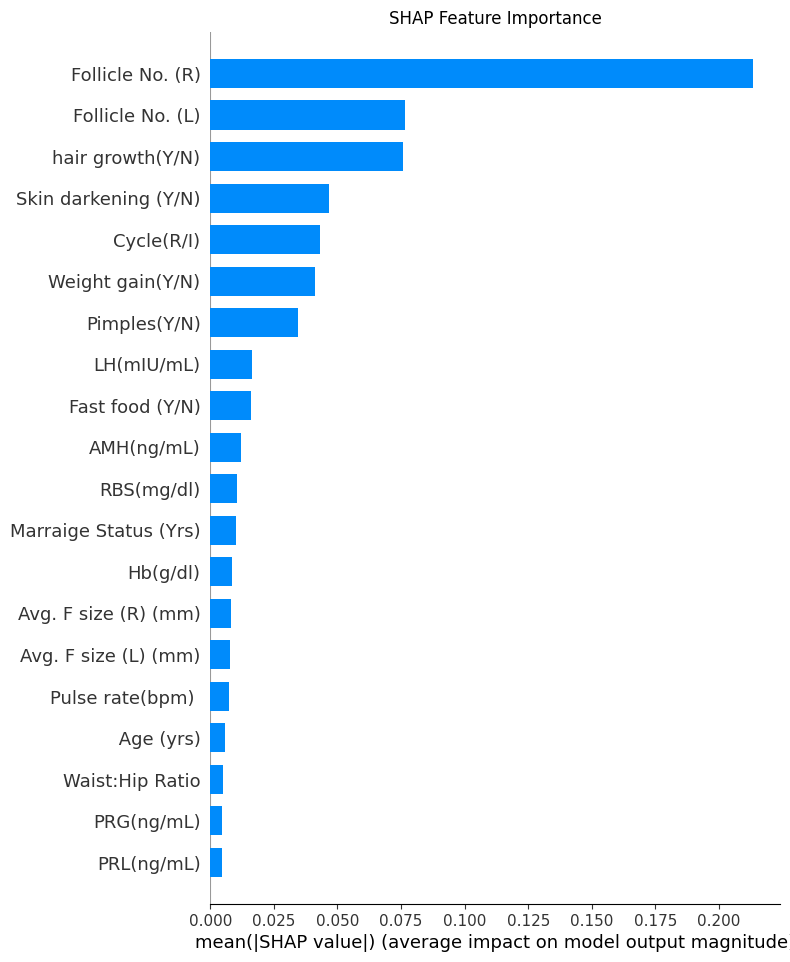


🤖 Deep Learning Model Accuracy: 0.904


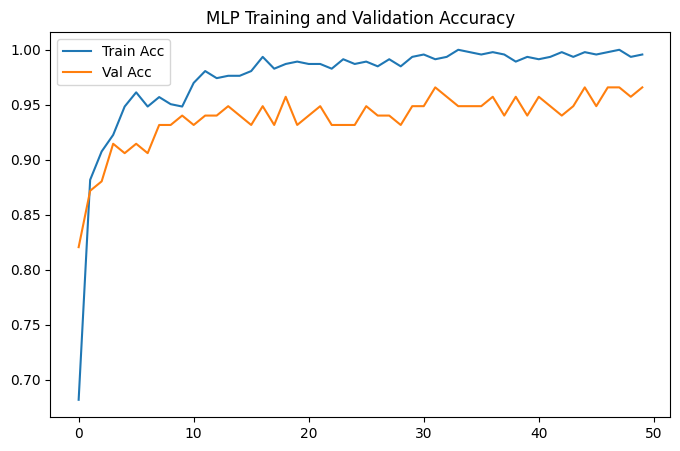

In [24]:
# ============================================================
# 📊 Complete Machine Learning Pipeline for PCOS / Health Data
# ============================================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# ============================================================
# STEP 1: Load Dataset
# ============================================================
file_path = "/content/data without infertility _final.csv"
df = pd.read_csv(file_path)

print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())

# ============================================================
# STEP 2: Handle Missing Values
# ============================================================
print("\nMissing Values Before:\n", df.isnull().sum())

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# Impute numeric with mean, categorical with mode
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')
df[num_cols] = imputer_num.fit_transform(df[num_cols])
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

print("\nMissing Values After:\n", df.isnull().sum())

# ============================================================
# STEP 3: Encode Categorical Columns
# ============================================================
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# ============================================================
# STEP 4: Remove Duplicates
# ============================================================
df.drop_duplicates(inplace=True)

# ============================================================
# STEP 5: Correlation Analysis
# ============================================================
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Remove highly correlated features
threshold = 0.85
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = [(x, y) for x, y in corr_pairs.index if x != y and corr_pairs[x, y] > threshold]
remove_cols = list(set([y for x, y in high_corr]))
df.drop(columns=remove_cols, inplace=True)
print(f"\n✅ Removed Highly Correlated Columns: {remove_cols}")

# ============================================================
# STEP 6: Feature and Target Split
# ============================================================
target_col = 'PCOS (Y/N)'  # Change if needed
X = df.drop(columns=[target_col])
y = df[target_col]

# ============================================================
# STEP 7: Balance Data using SMOTE (auto-fix)
# ============================================================
print("\nClass distribution before SMOTE:", Counter(y))
min_class_count = min(Counter(y).values())
k_neighbors = max(1, min(5, min_class_count - 1))
print(f"⚙️ Using k_neighbors={k_neighbors} for SMOTE")

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X, y = smote.fit_resample(X, y)
print("✅ SMOTE Balancing Done!")
print("Class distribution after SMOTE:", Counter(y))

# ============================================================
# STEP 8: Normalization
# ============================================================
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
X = pd.DataFrame(scaled_X, columns=X.columns)

# ============================================================
# STEP 9: Train-Test Split
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Train-Test Split Done")

# ============================================================
# STEP 10: Model Training
# ============================================================
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    }

results_df = pd.DataFrame(results).T
print("\n📊 Model Performance:\n", results_df)

# ============================================================
# STEP 11: Ensemble Models
# ============================================================
ensemble_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    }

results_df = pd.DataFrame(results).T
print("\n🚀 Ensemble Model Performance:\n", results_df)

# Pick best model
best_model_name = results_df["Accuracy"].idxmax()
best_model = ensemble_models.get(best_model_name, models.get(best_model_name))
print(f"\n🏆 Best Model: {best_model_name}")

# ============================================================
# STEP 12: SHAP Feature Importance
# ============================================================
booster = getattr(best_model, "get_booster", lambda: None)()
if booster:
    attrs = booster.attributes()
    if "base_score" in attrs and not attrs["base_score"].replace('.', '', 1).isdigit():
        booster.set_attr(base_score="0.5")
    explainer = shap.TreeExplainer(booster)
    shap_values = explainer.shap_values(X_test)
else:
    explainer = shap.Explainer(best_model.predict, X_train)
    shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.show()

# ============================================================
# STEP 13: Deep Learning (MLP)
# ============================================================
model_dl = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_dl.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)

# Evaluate
loss, acc = model_dl.evaluate(X_test, y_test, verbose=0)
print(f"\n🤖 Deep Learning Model Accuracy: {acc:.3f}")

# Plot training curves
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('MLP Training and Validation Accuracy')
plt.legend()
plt.show()
